# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bcg-forage/price_data.csv
/kaggle/input/bcg-forage/client_data.csv
/kaggle/input/final-data/final_client_df.csv


In [2]:
import pandas as pd
from functools import reduce 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

---
## 2. Load data

In [3]:
df = pd.read_csv("/kaggle/input/final-data/final_client_df.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,var_price sensitivity,fix_price sensitivity
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,NaN,NaN
1,1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,NaN,NaN
2,2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,NaN,NaN
3,3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,NaN,NaN
4,4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,NaN,NaN


In [5]:
df.shape

(175149, 36)

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('/kaggle/input/bcg-forage/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
price_df.shape

(193002, 8)

In [8]:
columns=[["price_off_peak_var", "price_off_peak_fix"], ["price_peak_var","price_peak_fix"], ["price_mid_peak_var", "price_mid_peak_fix"]]
frames=[]
for c in columns:
        monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({c[0]: 'mean', c[1]: 'mean'}).reset_index()
        # Get january and december prices
        jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
        dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
        diff = pd.merge(dec_prices.rename(columns={c[0]: 'dec_1', c[1]: 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
        diff[f'{c[0][:10]} diff_dec_january_energy'] = diff['dec_1'] - diff[c[0]]
        diff[f'{c[0][:10]} diff_dec_january_power'] = diff['dec_2'] - diff[c[1]]
        diff = diff[['id', f'{c[0][:10]} diff_dec_january_energy',f'{c[0][:10]} diff_dec_january_power']]
        frames.append(diff)
        #client_df= pd.merge(df, diff,on="id")
 


frames[0].shape

(16096, 3)

In [9]:
  data_merge = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["id"]),
                     frames)
data_merge.head()                           # Print merged DataFrame

,id,price_off_ diff_dec_january_energy,price_off_ diff_dec_january_power,price_peak diff_dec_january_energy,price_peak diff_dec_january_power,price_mid_ diff_dec_january_energy,price_mid_ diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916,-0.005120,0.097749,0.000763,0.065166
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,0.000000,0.000000,0.000000,0.000000


In [10]:
client_df= pd.merge(df, data_merge,on="id")
client_df.shape

(175149, 42)

In [11]:
client_df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,price_peak_fix,price_mid_peak_fix,var_price sensitivity,fix_price sensitivity,price_off_ diff_dec_january_energy,price_off_ diff_dec_january_power,price_peak diff_dec_january_energy,price_peak diff_dec_january_power,price_mid_ diff_dec_january_energy,price_mid_ diff_dec_january_power
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,24.339581,16.226389,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,24.339581,16.226389,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
2,2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,24.339578,16.226383,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
3,3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,24.339578,16.226383,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
4,4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,24.339578,16.226383,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389


In [12]:
df=client_df.drop(columns=['Unnamed: 0','id'])

In [13]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,price_peak_fix,price_mid_peak_fix,var_price sensitivity,fix_price sensitivity,price_off_ diff_dec_january_energy,price_off_ diff_dec_january_power,price_peak diff_dec_january_energy,price_peak diff_dec_january_power,price_mid_ diff_dec_january_energy,price_mid_ diff_dec_january_power
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,24.339581,16.226389,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,24.339581,16.226389,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
2,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,24.339578,16.226383,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
3,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,24.339578,16.226383,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
4,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,24.339578,16.226383,NaN,NaN,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389


___

# BUILD MODEL



In [14]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

In [15]:
df["date_activ"] = df["date_activ"].astype(object)
df["date_end"] = df["date_end"].astype(object)
df["date_modif_prod"] = df["date_modif_prod"].astype(object)
df["date_renewal"] =df["date_renewal"].astype(object)

**CHECKING FOR CORRELATION**

In [16]:
Corr_Matrix=df.corr()

/tmp/ipykernel_32/645773456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix=df.corr()


<Axes: >

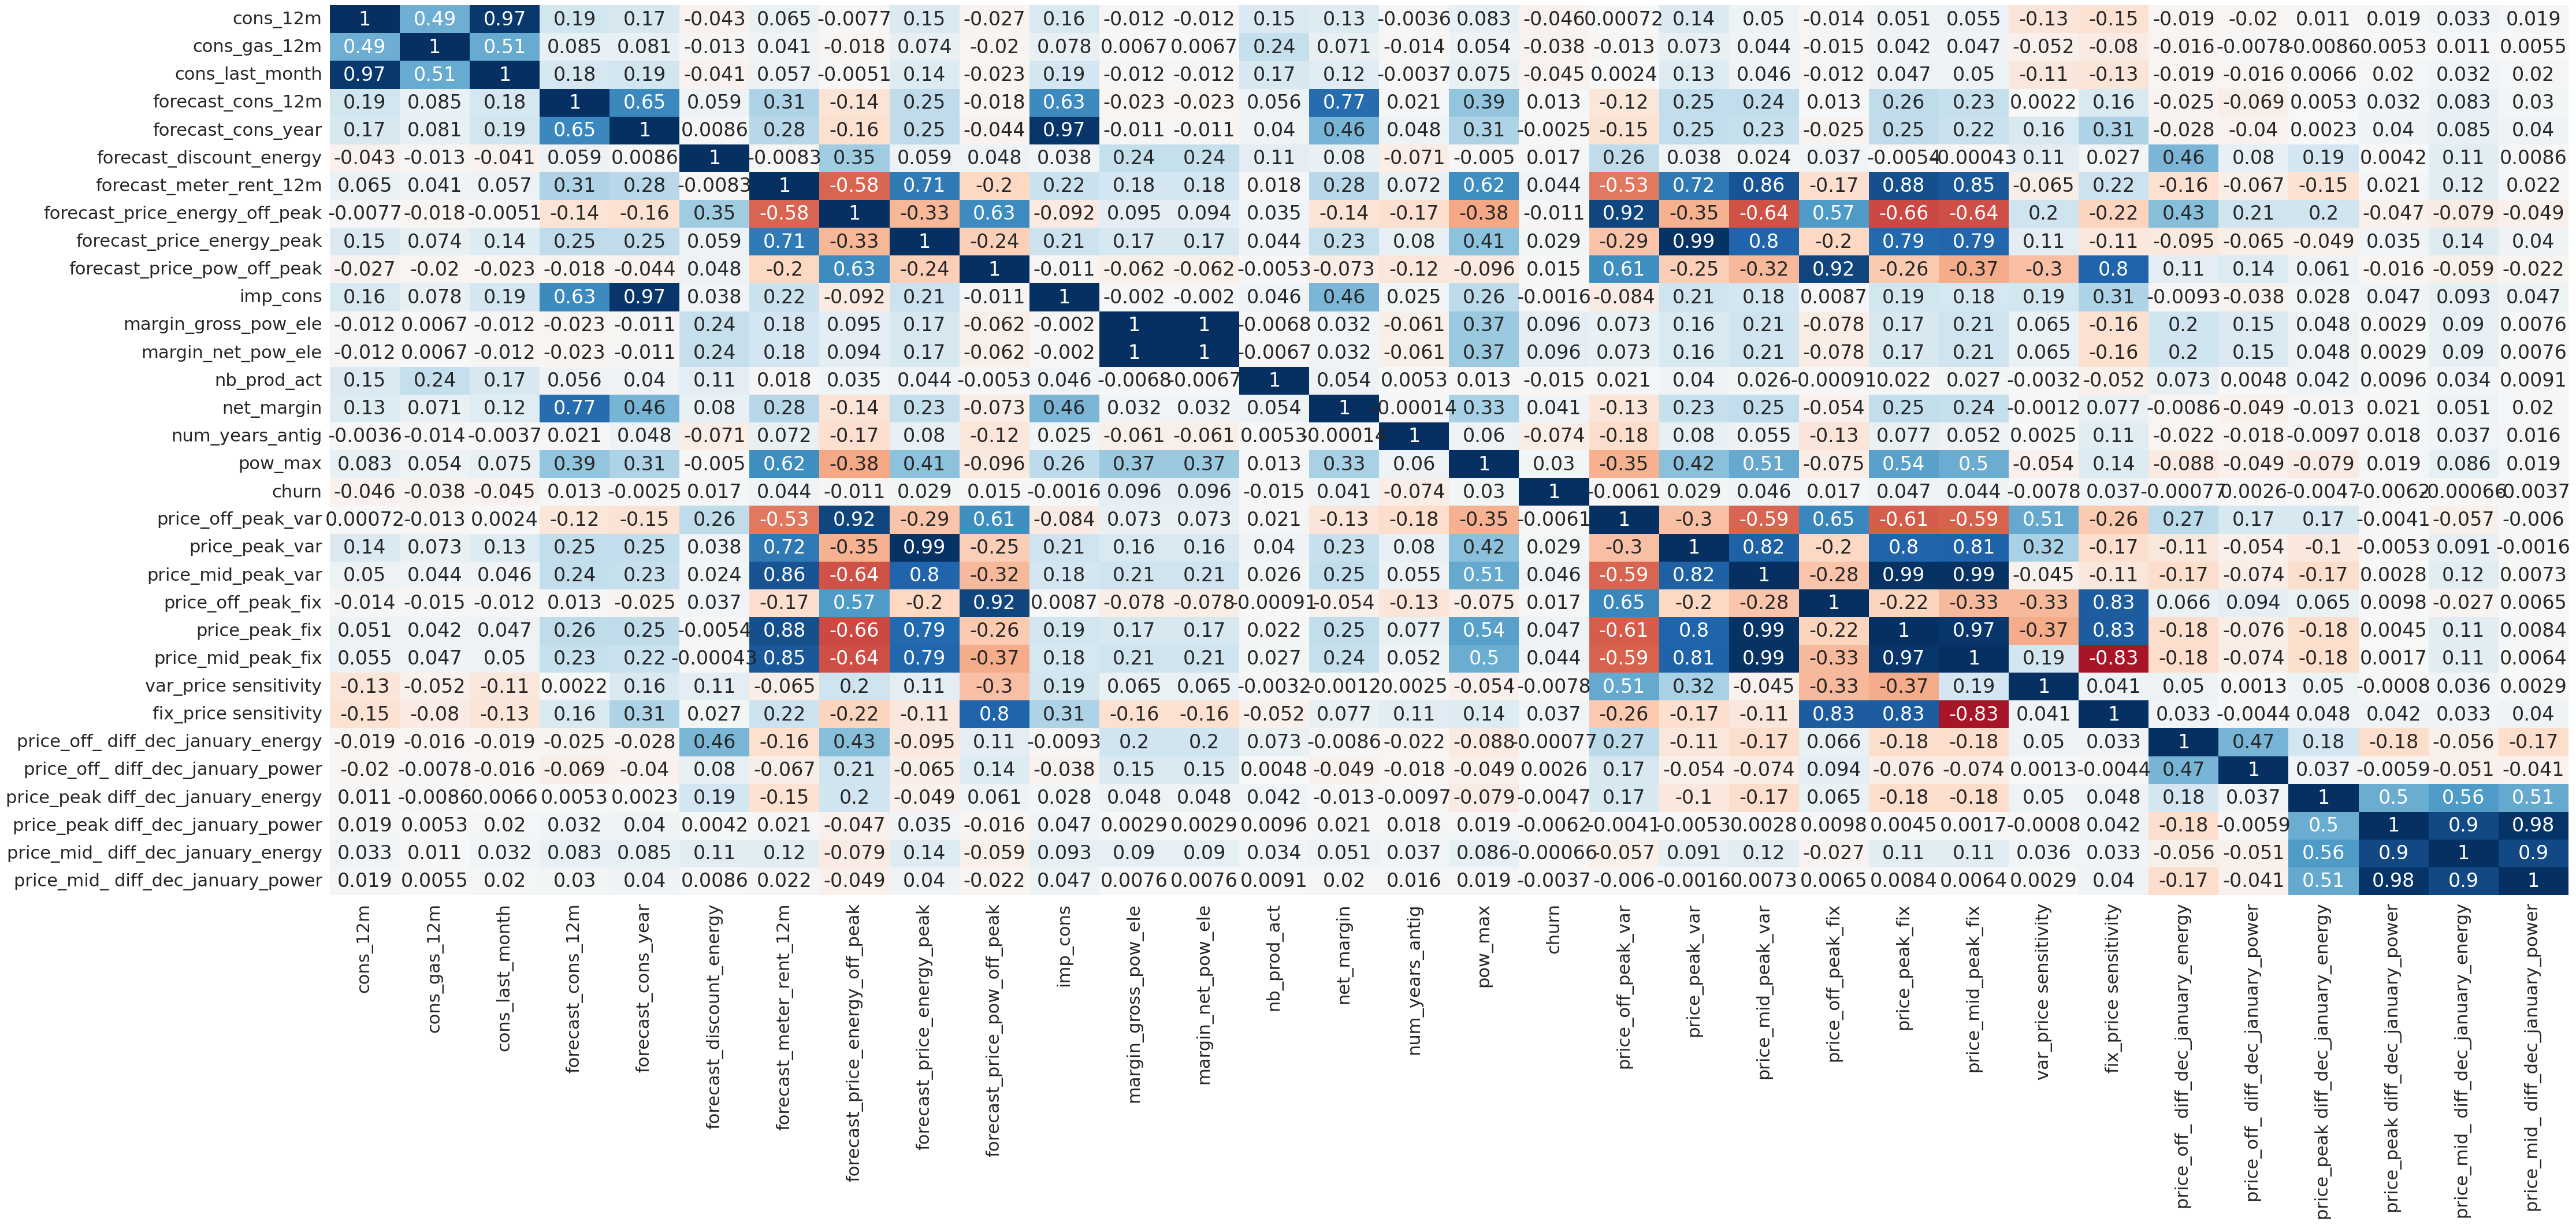

In [17]:
plt.figure(figsize=(50,20))
sn.set(font_scale=2)
sn.heatmap(Corr_Matrix, vmin=-1, vmax=1, annot=True, cmap='RdBu',cbar=False)

Churn has very low correlation with all the variables. However, we will use a model to detect the predictive power of thse variables.

## SPLIT DATA 

In [18]:
sn.set(font_scale=1)

In [19]:
y=df["churn"]
X=df.drop(columns="churn")

In [20]:
# y=y.astype(object)
# y.describe()

In [21]:
X.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'price_date',
       'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix',
       'var_price sensitivity', 'fix_price sensitivity',
       'price_off_ diff_dec_january_energy',
       'price_off_ diff_dec_january_power',
       'price_peak diff_dec_january_energy',
       'price_peak diff_dec_january_power',
       'price_mid_ diff_dec_january_energy',
       'price_mid_ diff_dec_january_power'],
      dtype='ob

In [22]:
X_split,X_test, y_split, y_test= train_test_split(X,y, test_size=0.1, random_state= 42)
X_train,X_val, y_train, y_val= train_test_split(X_split,y_split, test_size=0.1, random_state= 42)

In [23]:
print("Structure of the training set")
print(X_train.info())
print(" ")
print("Shape of Target Variable")
print(y_train.shape)
print(" ")
print("------------------------------")
print("Description of the Validation Set")
print(X_val.info())
print(" ")
print("Shape of Target Variable")
print(y_val.shape)
print(" ")
print("------------------------------")
print("Structure of the test set")
print(X_test.info())
print(" ")
print("Shape of Target Variable")
print(y_test.shape)

Structure of the training set
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141870 entries, 71823 to 48284
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   channel_sales                       141870 non-null  object 
 1   cons_12m                            141870 non-null  int64  
 2   cons_gas_12m                        141870 non-null  int64  
 3   cons_last_month                     141870 non-null  int64  
 4   date_activ                          141870 non-null  object 
 5   date_end                            141870 non-null  object 
 6   date_modif_prod                     141870 non-null  object 
 7   date_renewal                        141870 non-null  object 
 8   forecast_cons_12m                   141870 non-null  float64
 9   forecast_cons_year                  141870 non-null  int64  
 10  forecast_discount_energy            141870 non-null  float6

# BASELINE

In [24]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.9


# MODEL

## ITERATE

**PARAMETER TUNING**

In [25]:
params={"max_depth": range(5, 15, 5),"n_estimators": range(50, 300,50)}

model = make_pipeline(
           OrdinalEncoder(),
           SimpleImputer(),
           StandardScaler(),
           GridSearchCV(RandomForestClassifier(random_state=42),param_grid=params, cv=2, refit=True) 
    )

In [26]:
y_train.value_counts(normalize=True)

0    0.90313
1    0.09687
Name: churn, dtype: float64

In [27]:
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['channel_sales', 'date_activ', 'date_end',
                                      'date_modif_prod', 'date_renewal',
                                      'has_gas', 'origin_up', 'price_date'],
                                mapping=[{'col': 'channel_sales',
                                          'data_type': dtype('O'),
                                          'mapping': foosdfpfkusacimwkcsosbicdxkicaua    1
usilxuppasemubllopkaafesmlibmsdf    2
lmkebamcaaclubfxadlmueccxoimlema    3
MISSING                             4
ewpakwlliwisiw...
2015-04-01     4
2015-03-01     5
2015-09-01     6
2015-11-01     7
2015-06-01     8
2015-01-01     9
2015-12-01    10
2015-05-01    11
2015-08-01    12
NaN           -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=2,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': range(5, 15, 5),
                                          'n_estimators': range(50, 300, 50)}))])

In [28]:
model.named_steps.gridsearchcv.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [29]:
model.named_steps.gridsearchcv.best_score_

0.9100373581447805

## EVALUATE

**PERFORMANCE ON VALIDATION DATA**

In [30]:
print("Model's Accuracy Performance on the Training Dataset is", model.score(X_train, y_train))
print("Model's Accuracy Performance on the Validation Dataset is",model.score(X_val, y_val))

Model's Accuracy Performance on the Training Dataset is 0.9113766123916262
Model's Accuracy Performance on the Validation Dataset is 0.9094138543516874


In [31]:
y_pred=model.predict(X_val)

In [32]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False, True])

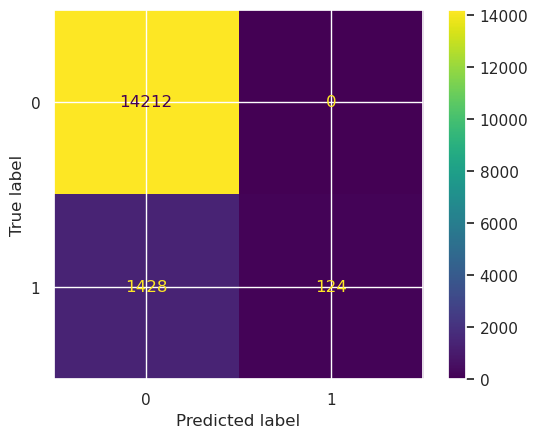

In [33]:
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val);

Although the model's captures 91% of the data accurately, majority of the churn are not accurately predicted with 1428 false negatives (predicted not churned but actually churned) and only 124 churned values predicted accurately in the validation set. This may be occuring because of imbalanced data as 90% of the observations has not churned. To address this, oversampling the minority category of churn will help increase the model's ability to capture more churn, since that is the results important in this case.

**TRAINING MODEL WITH OVER SAMPLED DATA TO REDUCE FALSE NEGATIVES**

In [34]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
y_train_over.value_counts()

X_train_over shape: (256254, 39)


1    128127
0    128127
Name: churn, dtype: int64

In [35]:
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['channel_sales', 'date_activ', 'date_end',
                                      'date_modif_prod', 'date_renewal',
                                      'has_gas', 'origin_up', 'price_date'],
                                mapping=[{'col': 'channel_sales',
                                          'data_type': dtype('O'),
                                          'mapping': foosdfpfkusacimwkcsosbicdxkicaua    1
usilxuppasemubllopkaafesmlibmsdf    2
lmkebamcaaclubfxadlmueccxoimlema    3
MISSING                             4
ewpakwlliwisiw...
2015-04-01     4
2015-03-01     5
2015-09-01     6
2015-11-01     7
2015-06-01     8
2015-01-01     9
2015-12-01    10
2015-05-01    11
2015-08-01    12
NaN           -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=2,
                              estimator=RandomForestClassifier(random_state=42),
                              param_grid={'max_depth': range(5, 15, 5),
                                          'n_estimators': range(50, 300, 50)}))])

In [36]:
print("Model's Accuracy Performance on the Training Dataset is", model.score(X_train, y_train))
print("Model's Accuracy Performance on the Validation Dataset is",model.score(X_val, y_val))

Model's Accuracy Performance on the Training Dataset is 0.8582505110312257
Model's Accuracy Performance on the Validation Dataset is 0.8535270235980715


In [37]:
y_pred=model.predict(X_val)

In [38]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False, True])

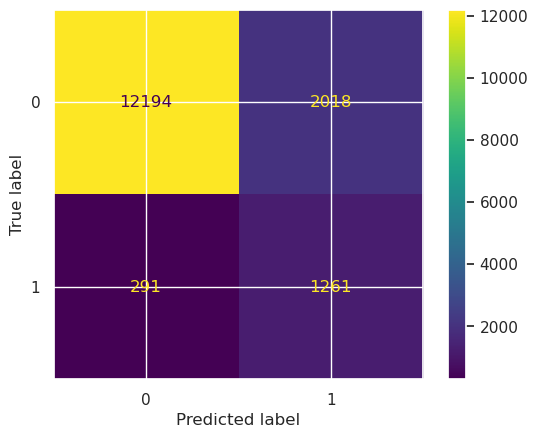

In [39]:
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val);

In [40]:
model.named_steps.gridsearchcv.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

**Model Selection**

In [41]:
best_model= make_pipeline(
           OrdinalEncoder(),
           SimpleImputer(),
           StandardScaler(),
           RandomForestClassifier(max_depth=10, random_state=42, n_estimators=50) 
    )

In [42]:
best_model.fit(X_train_over, y_train_over)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['channel_sales', 'date_activ', 'date_end',
                                      'date_modif_prod', 'date_renewal',
                                      'has_gas', 'origin_up', 'price_date'],
                                mapping=[{'col': 'channel_sales',
                                          'data_type': dtype('O'),
                                          'mapping': foosdfpfkusacimwkcsosbicdxkicaua    1
usilxuppasemubllopkaafesmlibmsdf    2
lmkebamcaaclubfxadlmueccxoimlema    3
MISSING                             4
ewpakwlliwisiw...
                                          'data_type': dtype('O'),
                                          'mapping': 2015-02-01     1
2015-10-01     2
2015-07-01     3
2015-04-01     4
2015-03-01     5
2015-09-01     6
2015-11-01     7
2015-06-01     8
2015-01-01     9
2015-12-01    10
2015-05-01    11
2015-08-01    12
NaN           -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))])

**PERFORMANCE ON TEST DATA**

In [43]:
y_test_pred=best_model.predict(X_test)

In [44]:
best_model.score(X_test, y_test)

0.854753068798173

In [45]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [False, True])

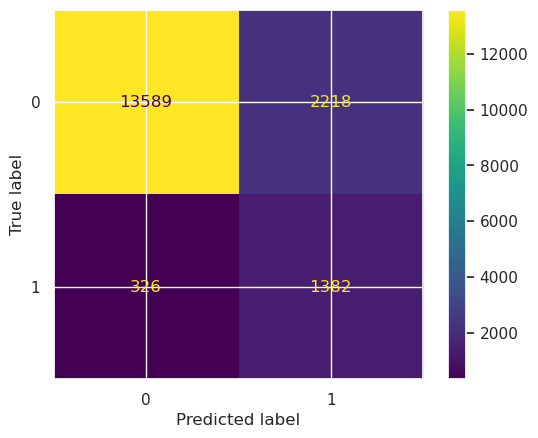

In [46]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test);

In [50]:
pred=round((confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1]))*100,4)
pred2=round((confusion_matrix[0,0]/(confusion_matrix[0,1]+confusion_matrix[0,0]))*100,4)
print("Total percentage of correct churn predicted is:", pred)
print("Total percentage of correct no churn predicted is:", pred2)

Total percentage of correct churn predicted is: 80.9133
Total percentage of correct no churn predicted is: 85.9682


## COMMUNICATE

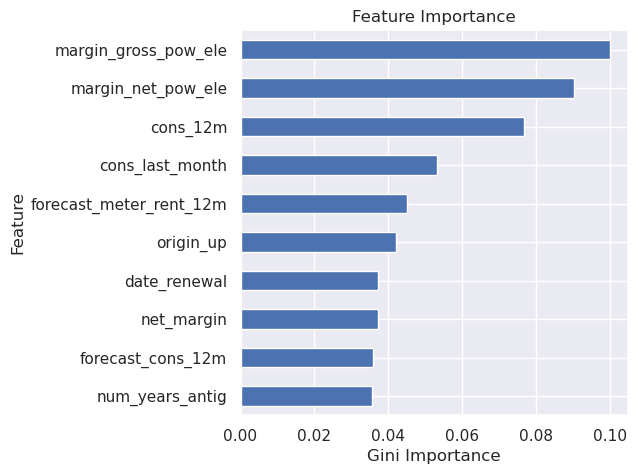

In [48]:
sn.set(font_scale=1)
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances =best_model.named_steps.randomforestclassifier.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh", figsize=(5,5))
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## FINDINGS

1. The top ten features in the model for predicting churn in descending order are: 

**['num_years_antig', 'forecast_cons_12m', 'net_margin', 'date_renewal', 'origin_up', 'forecast_meter_rent_12m', 'cons_last_month', 'cons_12m', 'margin_net_pow_ele', 'margin_gross_pow_ele']**

2. The model is 85% accurate on Test data. Although model's accuracy is low, it was able to capture 80.91% of churn.

3. Price Does not appear to be an important feature in churn prediction

4. This can be used to capture the group of customers who are likely to churn and insentivize them appropriately.